Here we give the required code and data to recreate the figures of the manuscript.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from mpl_toolkits.axes_grid1 import make_axes_locatable
from PIL import Image
from matplotlib.patches import Rectangle
from matplotlib import ticker

fsize = 12.5
tsize = 12
tdir = 'in'
major = 5.0
minor = 3.0
lwidth = 0.8
lhandle = 2.0
plt.style.use('seaborn-colorblind')
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = fsize
plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.markersize'] = 6
plt.rcParams['legend.fontsize'] = tsize
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['axes.linewidth'] = lwidth
plt.rcParams['legend.handlelength'] = lhandle
plt.rc("savefig", dpi=300)
plt.rcParams['axes.titley'] = 1.0
titles = ["(a)", "(b)", "(c)", "(d)"]

width = lambda p, w: 10 ** (np.log10(p) + w /2) - 10 ** (np.log10(p) - w / 2)
warnings.filterwarnings('ignore')

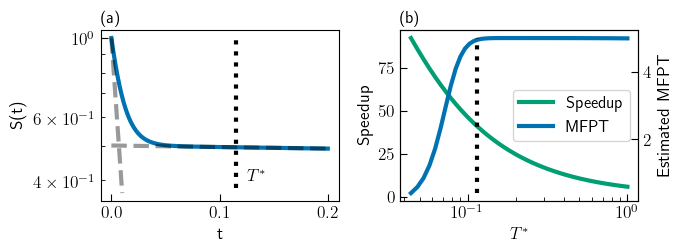

In [2]:
fig, axs = plt.subplots(1, 2, figsize = (7, 2.7))

t = np.array([i ** 2 for i in range(21, 101)])
p = 0.5
l2 = 0.00001
l1 = l2 * 1000

mfpt = (1 - p) / l1 + p / l2
muUp2 = (1 - p) * (1 / l1 - (t + 1 / l1) * np.exp(-l1 * t)) + p * (1 / l2 - (t + 1 / l2)*np.exp(-l2 * t))
prob = 1 - (1 - p)*np.exp(-l1 * t) - p * np.exp(- l2 * t)
slope = (-(1 - p) * np.exp(-l1 * t) * l1 - p * np.exp(-l2 * t) * l2) / ((1 - p)*np.exp(-l1 * t) + p * np.exp(-l2 * t))
pres = muUp2 * prob + (1 - prob) * (t - 1 / slope)
mu = ((1 - p) * (1 - np.exp(-l1 * t)) / l1 + p * (1 - np.exp(-l2 * t)) / l2) / (1 - (1 - p) * np.exp(-l1 * t) - p * np.exp(-l2 * t))
speedups = mfpt / mu
Tstar  = 0.115
x = np.linspace(0, 2000, 1000)
x2 = np.linspace(0, 100, 1000)

axs[0].plot(x / 10000, (1 - p) * np.exp(-l1 * x) + p * np.exp(-l2 * x), linewidth = 3)
axs[0].plot(x2 / 10000, np.exp(-l1 * x2), c = "black", linestyle = "dashed", linewidth = 3, alpha = 0.4)
axs[0].plot(x / 10000, np.exp(-0.6931094217989866 - l2 * x), c = "black", linestyle = "dashed", linewidth = 3, alpha = 0.4)
axs[0].plot([Tstar, Tstar], [0.38,1], c = "black", linestyle = "dotted", linewidth = 3)
axs[0].text(0.125, 0.4, r"$T^*$")
axs[0].set_xlabel("t")
axs[0].set_ylabel("S(t)")
axs[0].set_yscale("log")

axs[1].plot(t / 10000, speedups, linewidth = 3, c = '#009E73')
ax2 = axs[1].twinx()
ax2.plot(t / 10000, pres /10000, linewidth = 3)
ax2.plot([Tstar, Tstar], [pres.min() / 10000, 5], c = "black", linestyle = "dotted", linewidth = 3)
axs[1].set_xscale("log")
axs[1].set_xlim(*axs[1].get_xlim())
axs[1].plot([10, 19], [2, 2], linewidth = 3)
axs[1].legend(["Speedup", "MFPT"], loc = "center right")
axs[1].set_xlabel(r"$T^*$")
axs[1].set_ylabel("Speedup")
ax2.set_ylabel("Estimated MFPT")

for i in range(2):
    axs[i].set_title(titles[i], loc = "left", fontsize = 12)
    
fig.tight_layout()

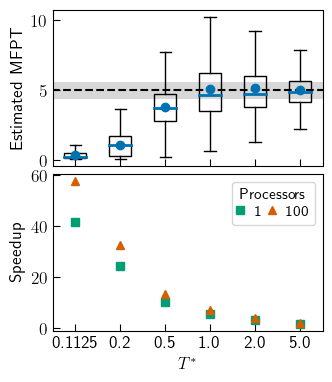

In [3]:
fig, axs = plt.subplots(2, 1, figsize = (3.5, 4))
axs = axs.flatten()

exactWalltime100 = 44.9423
data = pd.read_csv(f"hyperExponentialData.csv").sort_values(by="timer")

mfptsList = []
speedupslist = []
speedupslist100 = []
for timer in data.timer.drop_duplicates():
    da = data.loc[data.nProcessors == 1].loc[data.timer == timer]
    mfptsList.append(da.MFPT / 10000)
    speedupslist.append(5.005e6 / da.walltime.mean())
    da = data.loc[data.nProcessors == 100].loc[data.timer == timer]
    speedupslist100.append(exactWalltime100 * 10000 / da.walltime.mean())

axs[0].plot((0, 8) ,(5.005, 5.005), c = "black", linestyle = "dashed")

axs[0].boxplot(mfptsList, showfliers = False, patch_artist = True, manage_ticks = True,
               boxprops = {"facecolor": "none"}, medianprops = {"color": "#0072B2", "linewidth": 2},
               showmeans = True, meanprops = {"marker": "o", "markerfacecolor": "#0072B2", "markeredgecolor": "#0072B2"})
rect = Rectangle((0.5, 4.386037135941522), 6, 1.208276458277668, facecolor = 'gray', alpha = 0.3)
axs[0].add_patch(rect)
axs[0].set_ylabel("Estimated MFPT")
axs[0].set_xticklabels([])

axs[1].plot(np.linspace(1, 6, 6), speedupslist, "s", c = '#009E73')
axs[1].plot(np.linspace(1, 6, 6), speedupslist100, "^", c = '#D55E00')
axs[1].set_xticks(np.linspace(1, 6, 6))
axs[1].set_xticklabels(list(data.timer.drop_duplicates() / 10000))
axs[1].set_xlabel(r"$T^*$")
axs[1].set_ylabel("Speedup")
axs[1].legend([1, 100], handlelength = 0.25, fontsize = 11, title = "Processors", ncol = 2,
              title_fontsize = 11, loc = 'upper right', labelspacing = 0.25, columnspacing = 0.5)

for i in range(2):
    axs[i].set_xlim(0.5, 6.5)

fig.tight_layout(h_pad=0.2)

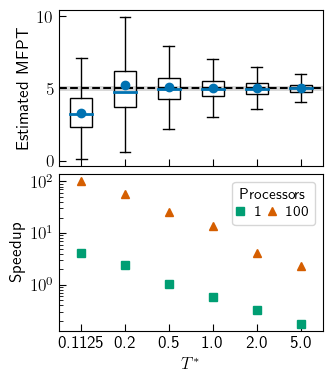

In [4]:
fig, axs = plt.subplots(2, 1, figsize = (3.5, 4))
axs = axs.flatten()

exactWalltime1000 = 67.9232
data = pd.read_csv(f"hyperExponentialDataSI.csv").sort_values(by="timer")

mfptsList = []
speedupslist = []
speedupslist1000 = []
for timer in data.timer.drop_duplicates():
    da = data.loc[data.nProcessors == 1].loc[data.timer == timer]
    mfptsList.append(da.MFPT / 10000)
    speedupslist.append(5.005e6 / da.walltime.mean())
    da = data.loc[data.nProcessors == 1000].loc[data.timer == timer]
    speedupslist1000.append(exactWalltime1000 * 10000 / da.walltime.mean())

axs[0].plot((0, 8) ,(5.005, 5.005), c = "black", linestyle = "dashed")

axs[0].boxplot(mfptsList, showfliers = False, patch_artist = True, manage_ticks = True,
               boxprops = {"facecolor": "none"}, medianprops = {"color": "#0072B2", "linewidth": 2},
               showmeans = True, meanprops = {"marker": "o", "markerfacecolor": "#0072B2", "markeredgecolor": "#0072B2"})
rect = Rectangle((0.5, 4.824979449884275), 6, 0.3615021865025483, facecolor = 'gray', alpha = 0.3)
axs[0].add_patch(rect)
axs[0].set_ylabel("Estimated MFPT")
axs[0].set_xticklabels([])

axs[1].plot(np.linspace(1, 6, 6), speedupslist, "s", c = '#009E73')
axs[1].plot(np.linspace(1, 6, 6), speedupslist1000, "^", c = '#D55E00')
axs[1].set_xticks(np.linspace(1, 6, 6))
axs[1].set_xticklabels(list(data.timer.drop_duplicates() / 10000))
axs[1].set_xlabel(r"$T^*$")
axs[1].set_ylabel("Speedup")
axs[1].set_yscale("log")
axs[1].legend([1, 100], handlelength = 0.25, fontsize = 11, title = "Processors", ncol = 2,
              title_fontsize = 11, loc = 'upper right', labelspacing = 0.25, columnspacing = 0.5)

for i in range(2):
    axs[i].set_xlim(0.5, 6.5)

fig.tight_layout(h_pad=0.2)

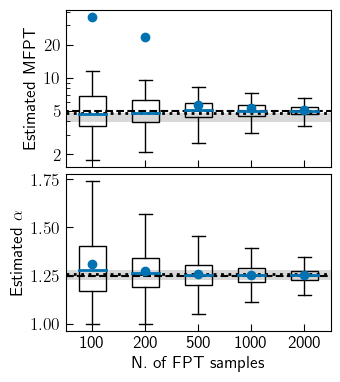

In [5]:
fig, axs = plt.subplots(2, 1, figsize = (3.5, 4))

data = pd.read_csv(f"paretoData.csv")

MFPT = []
walltime = []
walltime100 = []
alpha = []
for nFPT in list(data.nFPT.drop_duplicates()):
    MFPT.append(data.loc[data.nProcessors==100].loc[data.nFPT==nFPT].MFPT.dropna())
    walltime.append(data.loc[data.nProcessors==1].loc[data.nFPT==nFPT].walltime.dropna())
    walltime100.append(data.loc[data.nProcessors==100].loc[data.nFPT==nFPT].walltime.dropna())
    alpha.append(data.loc[data.nProcessors==100].loc[data.nFPT==nFPT].alpha.dropna())

axs[0].plot((0, 8),[5,5],linestyle = "dashed",c="black")
axs[0].boxplot(MFPT, showfliers = False, patch_artist = True, medianprops = {"color": "#0072B2", "linewidth": 2}, boxprops={"facecolor": "none"},
               showmeans = True, meanprops = {"marker": "o", "markerfacecolor": "#0072B2", "markeredgecolor": "#0072B2"}, widths = 0.5)
rect = Rectangle((0.5, 3.9499464349934863), 5, 0.7844405929463134, facecolor = 'gray', alpha = 0.3)
axs[0].add_patch(rect)
axs[0].set_xticklabels([])
axs[0].set_yscale("log")
axs[0].set_ylabel("Estimated MFPT")
axs[0].get_yaxis().set_major_formatter(ticker.ScalarFormatter())
axs[0].set_yticks([2,5,10,20])

axs[1].boxplot(alpha, showfliers = False, patch_artist = True, boxprops = {"facecolor": "none"}, medianprops = {"color": "#0072B2", "linewidth": 2},
               showmeans = True, meanprops = {"marker": "o", "markerfacecolor": "#0072B2", "markeredgecolor": "#0072B2"}, widths = 0.5)
rect = Rectangle((0.5, 1.2280025634543024), 5, 0.05322487565621992, facecolor = 'gray', alpha = 0.3)
axs[1].add_patch(rect)
axs[1].set_ylabel(r"Estimated $\alpha$")
axs[1].set_xlabel("N. of FPT samples")
axs[1].set_xticklabels(list(data.nFPT.drop_duplicates()))

for ax in axs[:2]:
    ax.set_xlim(0.5, 5.5)

axs[0].plot(axs[0].get_xlim(), [4.73761302213753, 4.73761302213753], c = "black", linestyle = "dotted", linewidth = 2)
axs[1].plot(axs[1].get_xlim(),[1.2570869308609423, 1.2570869308609423],c="black",linestyle="dotted",linewidth=2)
axs[1].plot(axs[1].get_xlim(),[1.25,1.25],linestyle = "dashed",c="black")

fig.tight_layout(h_pad=0.4)

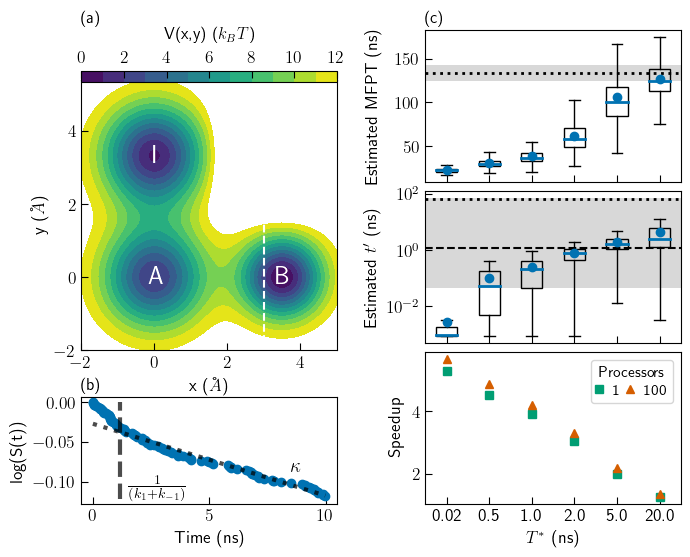

In [6]:
fig, axs = plt.subplots(1, 2, figsize = (7, 5.75))
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines[['left', 'right', 'top', "bottom"]].set_visible(False)
    
ax1 = axs[0].inset_axes([0., 0.32, 1, 0.58])
ax2 = axs[0].inset_axes([0., 0., 1, 0.225])
ax3 = axs[1].inset_axes([0., 0.68, 1, 0.32])
ax4 = axs[1].inset_axes([0., 0.34, 1, 0.32])
ax5 = axs[1].inset_axes([0., 0., 1, 0.32])

ax1_bar = axs[0].inset_axes([0., 0.89, 1, 0.025])

surface = pd.read_csv("threeStateSurface.csv")
im = ax1.tricontourf(surface.x, surface.y, surface.V, levels = np.linspace(0,12,13))
ax1.set_xlabel(r"x ($\AA$)")
ax1.set_ylabel(r"y ($\AA$)")
fig.colorbar(im, cax = ax1_bar, orientation = 'horizontal')
ax1_bar.xaxis.tick_top()
ax1_bar.set_title(f"V(x,y) ($k_BT$)", y = 3, fontsize = 12)

unbiased = pd.read_csv("threeStateUnbiased.csv")
ax2.plot(unbiased.t, np.log(unbiased.survival), "o")
ax2.text(1.5, -0.113, r"$\frac{1}{\left(k_1+k_{-1}\right)}$", fontsize = 14)
ax2.text(8.5, -0.0875, r"$\kappa$", fontsize = 14)

ax2.plot(unbiased.t, -9.070800816332124e-03 * unbiased.t - 0.027066413679384754, c = "black", linestyle = "dotted", linewidth = 3, alpha = 0.7)
ax2.plot([1.1600595383221657, 1.1600595383221657], [-0.12208724730282736, 0], c = "black", linestyle = "dashed", linewidth = 3, alpha = 0.7)
ax2.set_xlabel("Time (ns)")
ax2.set_ylabel("log(S(t))")

data = pd.read_csv("threeStateBiased.csv").sort_values(by = "timer")
    
MFPTlist = []
tstarslist = []
walltimelist = []
walltime100list = []
for timer in data.timer.drop_duplicates():
    da = data.loc[data.timer == timer].loc[data.nProcessors == 100]
    MFPTlist.append(da.MFPT/1000)
    tstarslist.append(da.tstar/1000)
    walltimelist.append(data.loc[data.timer == timer].loc[data.nProcessors == 1].walltime.mean())
    walltime100list.append(da.walltime.mean())

ax3.boxplot(MFPTlist, showfliers = False, patch_artist = True, boxprops={"facecolor": "none"}, medianprops = {"color": "#0072B2", "linewidth": 2},
               showmeans = True, meanprops = {"marker": "o", "markerfacecolor": "#0072B2", "markeredgecolor": "#0072B2"})
ax4.boxplot(tstarslist, showfliers = False, patch_artist = True, boxprops = {"facecolor": "none"}, medianprops = {"color": "#0072B2","linewidth": 2},
               showmeans = True, meanprops = {"marker": "o", "markerfacecolor": "#0072B2", "markeredgecolor": "#0072B2"})

ax5.set_xlabel(r"$T^*$ (ns)")
ax3.set_ylabel("Estimated MFPT (ns)", labelpad = 9.25)
ax5.set_ylabel("Speedup", labelpad = 6)
ax4.set_ylabel(r"Estimated $t'$ (ns)")
ax4.set_yscale("log")

ax3.set_xticklabels([])
ax4.set_xticklabels([])
ax3.set_xlim(*ax3.get_xlim())
ax4.set_xlim(*ax4.get_xlim())

rect = Rectangle((0.5, 124.67035984249999), 6, 17.761094457499993, facecolor = 'gray', alpha = 0.3)
ax3.add_patch(rect)
ax3.plot(ax3.get_xlim(), [132.9981330142, 132.9981330142], c = "black", linestyle = "dotted", linewidth = 2)

rect = Rectangle((0.5, 0.045347), 6, 69.69624125, facecolor = 'gray', alpha = 0.3)
ax4.add_patch(rect)
ax4.plot(ax4.get_xlim(), [64.87330931999999, 64.87330931999999], c = "black", linestyle = "dotted", linewidth = 2)
ax4.plot(ax4.get_xlim(), [1.1600595383221657, 1.1600595383221657], c = "black", linestyle = "dashed")

ax5.plot(np.linspace(1,6,6), 12963298.331010003 / np.array(walltimelist), "s", c = '#009E73')
ax5.plot(np.linspace(1,6,6), 728254.9087200001 / np.array(walltime100list), "^", c = '#D55E00')
ax5.legend([1,100], handlelength = 0.25, fontsize = 11, title="Processors", title_fontsize = 11, loc = 'upper right',
                 labelspacing = 0.25, ncol = 2, columnspacing = 0.5)
ax5.set_xticks(np.linspace(1,6,6))
ax5.set_xticklabels(list(data.timer.drop_duplicates() / 1000))
ax5.set_xlim(0.5, 6.5)

axs = [axs[0], ax2, ax3]
for i in range(3):
    axs[i].set_title(titles[i], loc = "left", fontsize = 12)

ax1.set_ylim(*ax1.get_ylim())
ax1.plot([3, 3], [-3, 3], linestyle = "dashed",c = "white")
ax1.text(0.03, 0, "A", color = "white", fontsize = 18, ha = "center", va = "center")
ax1.text(0.05, 3.3, "I", color = "white", fontsize = 18, ha = "center", va = "center")
ax1.text(3.55, 0, "B", color = "white", fontsize = 18, ha = "center", va = "center")

ax1.set_aspect('equal')
fig.tight_layout()

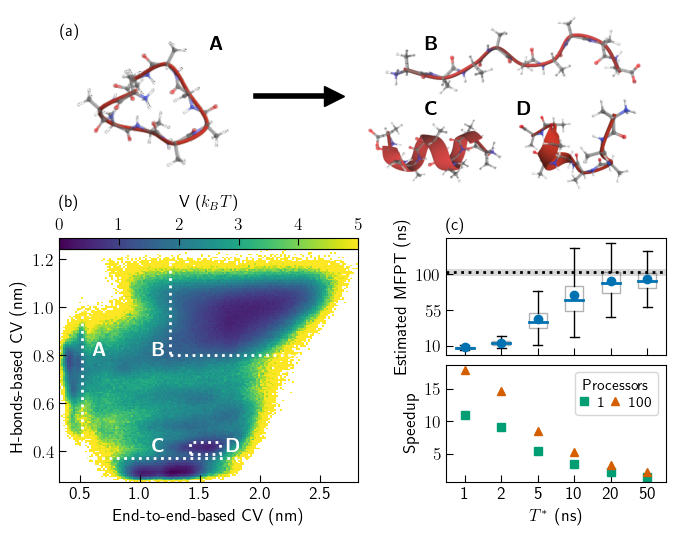

In [7]:
fig, ax = plt.subplots(2, 2, figsize = (7, 5.5), gridspec_kw = {'height_ratios': [1, 1.8], 'width_ratios': [3, 2.1]})

img = np.asarray(Image.open('loop.png'))
ax1 = ax[0][0].inset_axes([-0.175, -0.1, 1, 1])
ax1.imshow(img)

img = np.asarray(Image.open('open.png'))
ax2 = ax[0][1].inset_axes([-0.4, 0.4, 1.4, 0.7])
ax2.imshow(img)

img = np.asarray(Image.open('helix.png'))
ax3 = ax[0][1].inset_axes([-0.4, -0.3, 0.7, 0.7])
ax3.imshow(img)

img = np.asarray(Image.open('halfHelix.png'))
ax4 = ax[0][1].inset_axes([0.2, -0.3, 0.8, 0.8])
ax4.imshow(img)

ax[0][0].text(0.025, 0.9, "(a)", fontsize = 12, zorder = 10)

ax[0][0].set_xlim(*ax[0][0].get_xlim())
ax[0][0].set_ylim(*ax[0][0].get_ylim())
ax[0][1].set_xlim(*ax[0][1].get_xlim())
ax[0][1].set_ylim(*ax[0][1].get_ylim())

ax[0][0].plot([0.65, 0.9], [0.45, 0.45], c = "black", linewidth = 4, zorder = 10)
ax[0][0].plot(0.9, 0.45, ">", c = "black", ms = 15, zorder = 10)

ax[0][0].text(0.5, 0.8, r"$\textbf{A}$", zorder = 10, fontsize = 14)
ax[0][1].text(-0.1, 0.8, r"$\textbf{B}$", zorder = 10, fontsize = 14)
ax[0][1].text(-0.1, 0.32, r"$\textbf{C}$", zorder = 10, fontsize = 14)
ax[0][1].text(0.32, 0.32, r"$\textbf{D}$", zorder = 10, fontsize = 14)

axFES = ax[1][0]

im = axFES.imshow(np.loadtxt("ala9Surface"), interpolation = 'nearest', origin = 'lower', 
                  extent = [0.1643935, 1.4089405, 0.271946, 1.240798], vmax = 5)
divider = make_axes_locatable(axFES)
cax = divider.append_axes('top', size = '5%', pad = 0.0)
fig.colorbar(im, cax = cax, orientation = "horizontal")
cax.set_title(f"V ($k_BT$)", y = 3, fontsize = 12)
cax.xaxis.tick_top()
axFES.set_xlabel("End-to-end-based CV (nm)")
axFES.set_ylabel("H-bonds-based CV (nm)")
cax.set_title("(b)", loc = "left", y = 3, fontsize = 12)

rect = Rectangle((0.625, 0.8), 0.75, 0.5, linestyle = 'dotted', facecolor = 'None', clip_on = False, ec = "white", linewidth = 2)
axFES.add_patch(rect)
rect = Rectangle((0., 0.27), 1, 0.1, linestyle = 'dotted', facecolor = 'None', clip_on = False, ec = "white", linewidth = 2)
axFES.add_patch(rect)
rect = Rectangle((0.71, 0.39), 0.125, 0.05, linestyle = 'dotted', facecolor = 'None', clip_on = False, ec = "white", linewidth = 2)
axFES.add_patch(rect)

axFES.set_xlim(*axFES.get_xlim())
axFES.set_ylim(*axFES.get_ylim())
axFES.plot([0.26, 0.26], [0.4, 1.1], linestyle = 'dotted',c = "white", linewidth = 2)
axFES.text(0.3, 0.8, r"$\textbf{A}$", zorder = 10, fontsize = 14, color = "white")
axFES.text(0.55, 0.8, r"$\textbf{B}$", zorder = 10, fontsize = 14, color = "white")
axFES.text(0.55, 0.4, r"$\textbf{C}$", zorder = 10, fontsize = 14, color = "white")
axFES.text(0.86, 0.4, r"$\textbf{D}$", zorder = 10, fontsize = 14, color = "white")
axFES.set_xticklabels([str(tick * 2) for tick in axFES.get_xticks()])

axMFPT = ax[1][1].inset_axes([0.0, 0.52, 1, 0.48])

data = pd.read_csv("ala9Data.csv").sort_values(by="timer")
MFPT = 102.283176
walltimeUnbiased = 10153.9184
walltime100Unbiased = 856.5897
errorUnbiased = 4.7224545882053395

mfpts = []
speedups = []
speedups100 = []
for timer in data.timer.drop_duplicates():
    da = data.loc[data.timer == timer].loc[data.nProcessors == 100]
    mfpts.append(da.MFPT)
    speedups.append(walltimeUnbiased / data.loc[data.timer == timer].loc[data.nProcessors == 1].walltime.mean())
    speedups100.append(walltime100Unbiased / da.walltime.mean())

axMFPT.boxplot(mfpts, showfliers = False, patch_artist = True, boxprops = {"alpha": 0.3, "facecolor": "none"},
               medianprops = {"color": "#0072B2", "linewidth": 2}, showmeans = True, 
               meanprops = {"marker": "o", "markerfacecolor": "#0072B2", "markeredgecolor": "#0072B2"})

axMFPT.set_title("(c)", loc = "left", fontsize = 12)
axMFPT.set_xticklabels([])
axMFPT.set_ylabel("Estimated MFPT (ns)")
axMFPT.set_yticks([10, 55, 100])
axMFPT.set_xlim(*axMFPT.get_xlim())
axMFPT.plot(axMFPT.get_xlim(), [MFPT, MFPT], c = "black", linestyle = "dotted", linewidth = 2)
rect = Rectangle((0.5, MFPT - errorUnbiased), 6, 2 * errorUnbiased, facecolor = 'gray', alpha = 0.3)
axMFPT.add_patch(rect)

axSpeedup = ax[1][1].inset_axes([0.0,0., 1, 0.48])
axSpeedup.plot(np.linspace(1, 6, 6), speedups, "s", c = '#009E73')
axSpeedup.plot(np.linspace(1, 6, 6), speedups100, "^", c = '#D55E00')
axSpeedup.legend([1, 100], handlelength = 0.25, fontsize = 11, title = "Processors", title_fontsize = 11,
                 loc = 'upper right', labelspacing = 0.25, ncol = 2, columnspacing = 0.5)
axSpeedup.set_xticks(np.linspace(1, 6, 6))
axSpeedup.set_xticklabels(data.timer.drop_duplicates())
axSpeedup.set_xlabel(r"$T^*$ (ns)")
axSpeedup.set_ylabel("Speedup")
axSpeedup.set_xlim(0.5, 6.5)

for a in [ax[0][0], ax[0][1], ax[1][1], ax1, ax2, ax3, ax4]:
    a.set_xticks([])
    a.set_yticks([])
    a.spines[['left', 'right', 'top', "bottom"]].set_visible(False)
fig.tight_layout(w_pad = 0)

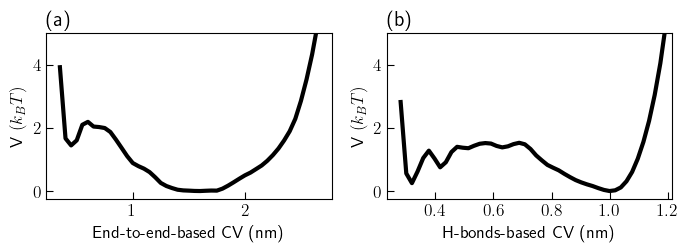

In [8]:
fig, axs = plt.subplots(1, 2, figsize = (7, 2.7))

data = pd.read_csv("surfaceEnd2End.csv")
axs[0].plot(data.x, data.FES, c = "black", linewidth = 3)
data = pd.read_csv("surfaceHbonds.csv")
axs[1].plot(data.x, data.FES, c = "black", linewidth = 3)

for i in range(2):
    axs[i].set_ylim(-0.25, 5)
    axs[i].set_xlim(right = 0.95 * axs[i].get_xlim()[1])
    axs[i].set_ylabel(r"V $\left(k_BT\right)$")
    axs[i].set_title(titles[i], loc = "left")
axs[0].set_xlabel("End-to-end-based CV (nm)")
axs[1].set_xlabel("H-bonds-based CV (nm)")
fig.tight_layout()